In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.optimize import fsolve



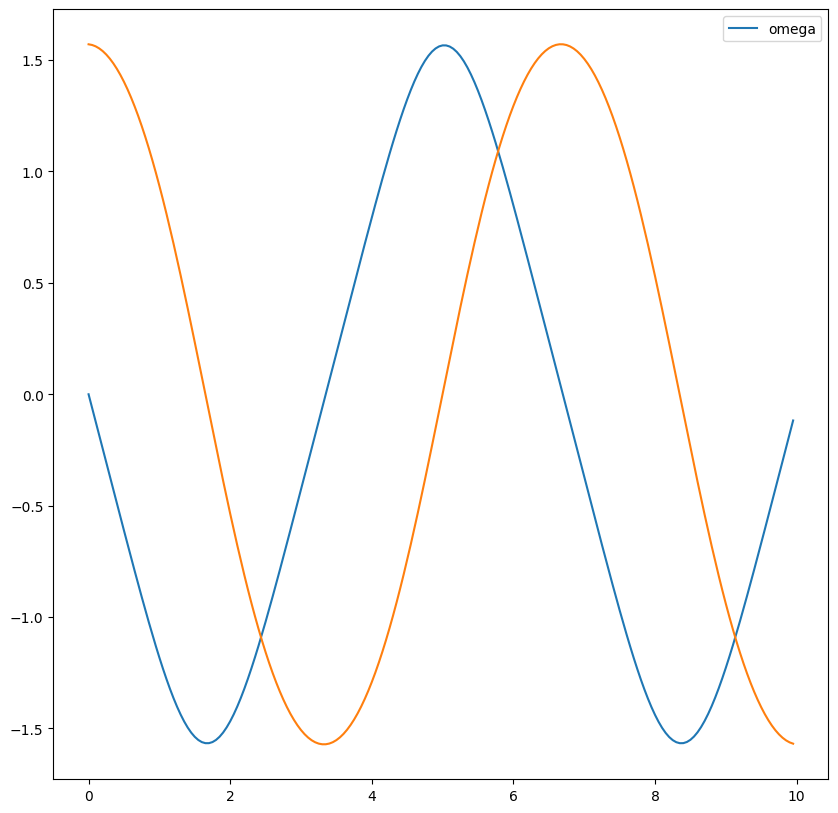

In [39]:
TIMESTEP = 0.05

def thetafunc(om_1, th_1, dt = TIMESTEP):
    """Defines the function for the theta equation.
    
    Arguments:
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
    """
    thetai = om_1*dt + th_1
    return thetai

def omfunc(om_1, th_1, params = 9.81/8,dt = TIMESTEP):
    """Defines the function for the angular velocity equation.
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
        params: vector of parameters:
        g = gravity
        l = length of pendulum
    """

    omi = om_1 - params*np.sin(th_1)*dt
    return omi
timepoint = np.arange(0, 10, TIMESTEP)
om = np.full_like(timepoint, 0)
theta = np.full_like(timepoint, 0)

theta[0] = np.pi/2
om[0] = 0
for i in np.arange(1, len(timepoint)):
    om[i] = omfunc(om[i-1], theta[i-1])
    theta[i] = thetafunc(om[i], theta[i-1])



plt.figure(figsize = (10, 10))
plt.plot(timepoint, om,label = "omega")
plt.plot(timepoint, theta )
plt.legend()
plt.show()


In [18]:
#Probably already did this...
import numpy as np

def part2_pend_ode(t, coords):
    "Function defining the pendulum ODE.  Signature as specified in scipy.integrate"
    Q, W = coords #< tuple unpacking.  
    # Here I use Q and W as theta and omega, respectively.  
    # Single-letter variable names are fine in small functions, but be more careful if you have big blocks (>10 lines) of code
    
    g = 9.81
    l = 1
    
    dQ_dt = W
    dW_dt = -g/l * np.sin(Q)
    return [dQ_dt,dW_dt]

#CHECK: If my pendulum is at positive displacement and at rest it will accelerate (dW/dt) in a -ive direction
CHECK_START1 = (0.1,0.0)
print(part2_pend_ode(0, CHECK_START1), "should be [0, <0]?")

#CHECK: If my pedulum is at zero displacement but moving in a positive direction the change in angle (dQ/dt) will be positive.
CHECK_START2 = (0.0,0.1)
print(part2_pend_ode(0, CHECK_START2), "should be [>0, 0]?")


from scipy.integrate import solve_ivp

TIME_RANGE = [0,10]

THETA_START = np.pi/2
OMEGA_START = 0

soln = solve_ivp(part2_pend_ode, TIME_RANGE, [THETA_START, OMEGA_START], max_step = 0.05)

#Can check everything came out ok before we try to use the solution
#print(soln)

soln_times =soln.t
soln_theta, soln_omega = soln.y

#Normalise the solution to plot both on the same axis
soln_theta /= np.max(soln_theta)
soln_omega /= np.max(soln_omega)


[0.0, -0.9793658173053843] should be [0, <0]?
[0.1, -0.0] should be [>0, 0]?


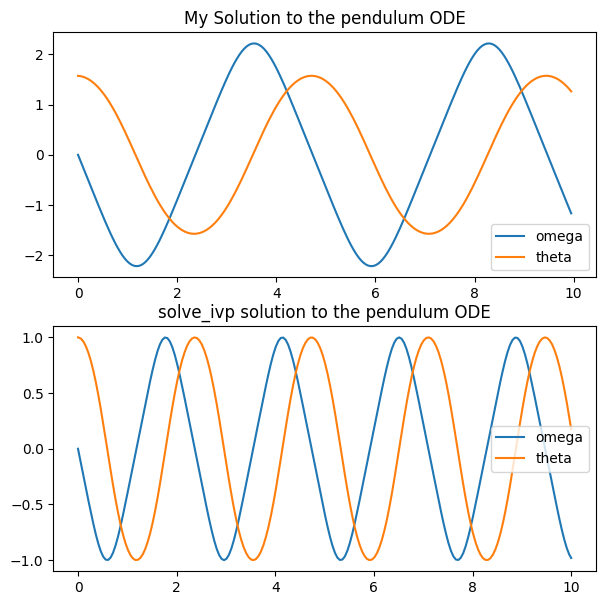

In [26]:
plt.figure(figsize = (7,7))
plt.subplot(2,1,1)
plt.title("My Solution to the pendulum ODE")
plt.plot(timepoint, om,label = "omega")
plt.plot(timepoint, theta, label = "theta")
plt.legend()
plt.subplot(2,1,2)
plt.title("solve_ivp solution to the pendulum ODE")
plt.plot(soln_times, soln_omega, label = "omega")
plt.plot(soln_times, soln_theta, label = "theta")
plt.legend()
plt.show()

Do they produce the same solution

# Part 3

(20004,)


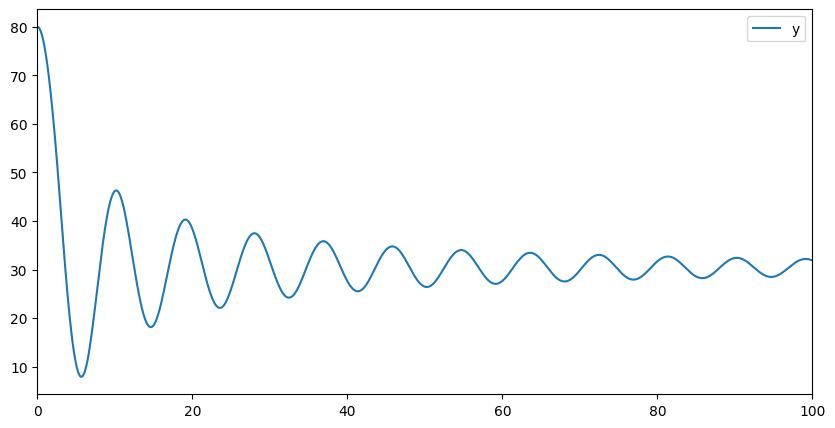

In [24]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def elas(k,x):
    return k*x

def drag(cl,ct,v):
    return -(cl*v)-(ct*(abs(v))*v)
    
def bungee(t, coords):
    """
    Function defining the bungee ODE.  Signature as specified in scipy.integrate
    """
    y, v = coords #< tuple unpacking.  

    g = -9.81
    m = 80
    k = 40
    l = 30
    cl = 1
    ct = 1
    y0 = 80
    dy_dt = v


    if y >= 50:
        dv_dt = g  + drag(1,1,v)/m
    elif y < 50 and y > 0:
        dv_dt = g + drag(1,1,v)/m + elas(k,y0-l-y)/m
    elif y <= 0:
        dv_dt = elas(k,y0-l-y)
    elif y>0 :
        dv_dt = g + drag(1,1,v)/(m/2) + elas(k,y0-l-y)/(m/2)
    




    
    return [dy_dt,dv_dt]

TIME_RANGE = [0,1000]

Y_inintial = 80
V_initial = 0

soln = solve_ivp(bungee, TIME_RANGE, [Y_inintial, V_initial], max_step = 0.05)

soln_times =soln.t
soln_y, soln_v = soln.y
rest = np.full_like(soln_times, soln_y[-1])

acc = []
for i in range(len(soln_times)):
    acceleration = bungee(soln_times, [soln_y[i], soln_v[i]])
    acc.append(acceleration[1])


print(np.array(acc).shape)
plt.figure(figsize=(10,5))
plt.plot(soln_times, soln_y, label = "y")
# plt.plot(soln_times, rest, label = "rest")
# plt.plot(soln_times, acc, label = "acc")

plt.xlim(0,100)
# plt.plot(soln_times, soln_v, label = "v")
plt.legend()
plt.show()

